In [1]:
import cantera

Set up different water/steam values (inputs and outputs)

Initial conditions

$T_1 = 240 ^\circ C$

$P_1 = 10 \text{ bar} = 1\tt{E}$$ 6 \text{ Pa}$

In [2]:
T1 = 240+273
P1 = 1e6

H2O = cantera.Water()
H2O.TP = T1, P1
h1 = H2O.enthalpy_mass
s1 = H2O.entropy_mass

Steam output has given pressure

$P_2 = 1.5 \text{ bar} = 1.5 \tt{E}$$5 \text{ Pa}$

and $S_2 = S_1$ b.c. adiabatic


In [3]:
P2 = 1.5e5

H2O_2 = cantera.Water()
H2O_2.SP = s1, P2
h2 = H2O_2.enthalpy_mass

Water enters the pump with

$P_3 = 1 \text{ bar} = 1e5 \text{ Pa}$ and

$T_3 = 15 ^\circ C$

In [4]:
T3 = 15+273
P3 = 1e5

H2O_3 = cantera.Water()
H2O_3.TP = T3, P3
h3 = H2O_3.enthalpy_mass
s3 = H2O_3.entropy_mass

Water exits pump with

$P_4 = 60 \text{ bar} = 6e6 \text{ Pa}$

and $S_4 = S_3$

In [5]:
P4 = 6e6

H2O_4 = cantera.Water()
H2O_4.SP = s3, P4
h4 = H2O_4.enthalpy_mass

Ideal turbine work and isentropic pump work:

In [6]:
w_ts = h1 - h2
w_ps = h4 - h3

mratio_ideal = w_ts / w_ps
print(mratio_ideal)

60.72309516596035


Efficiency of turbine and pump are given as:

$\eta_{turbine} = 85\%$

$\eta_{pump} = 75\%$

Real work is $\eta \times ideal$

In [7]:
η_t = .85
η_p = .75

In [8]:
work_t = w_ts * η_t
work_p = w_ps * η_p

Update enthalpies for non-ideal case

In [9]:
h2 = h1 - work_t
h4 = work_p + h3

Update mass flow rate:

In [10]:
mratio = (h1 - h2) / (h4 - h3)
print(mratio)

68.81950785476246


Percent decrease in pumping ratio:

In [11]:
pdec = (mratio_ideal - mratio) / mratio_ideal

In [12]:
pdec

-0.13333333333345515

## P-T graph for turbine

In [13]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [14]:
p_vec = numpy.linspace(P1, P2, 100)
temp_vec = numpy.zeros(100)

In [15]:
for i, p in enumerate(p_vec):
    H2O.SP = s1, p
    temp_vec[i] = H2O.T

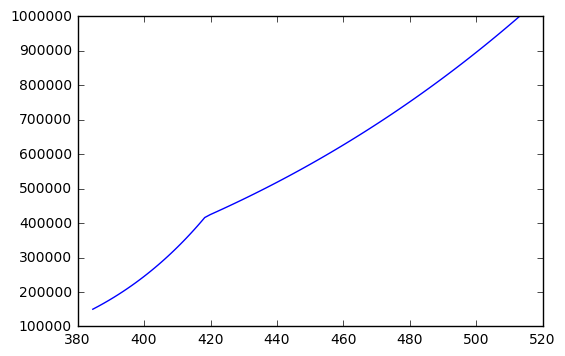

In [16]:
pyplot.plot(temp_vec, p_vec)

## P-T graph for pump

In [17]:
p_vec = numpy.linspace(P3, P4, 100)
temp_vec = numpy.zeros(100)

In [18]:
for i, p in enumerate(p_vec):
    H2O.SP = s3, p
    temp_vec[i] = H2O.T

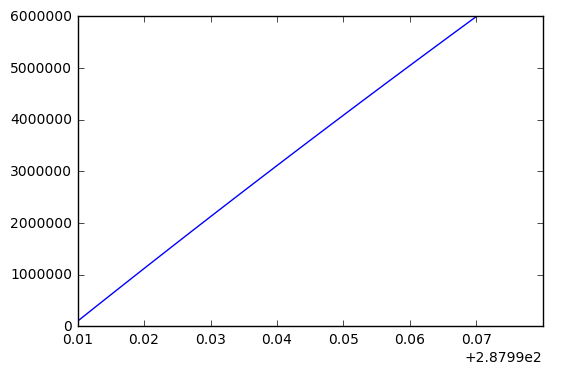

In [19]:
pyplot.plot(temp_vec, p_vec)

In [20]:
.01 * 2.8799e2

2.8799